In [75]:
import sys
import os
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegFileWriter
import pandas as pd
sys.path.insert(0, '../../')

import magcolloids as mgc
#pint parameter
ureg = mgc.ureg

EXTRAS

In [76]:
plt.rcParams['animation.ffmpeg_path'] = r'C:\\ffmpeg\\bin\\ffmpeg'
mplt.rcParams['agg.path.chunksize'] = 100000

def redefine_field(field,tilt_angle):
    field.fieldx = 'v_Bmag*(sin(v_freq*time*2*PI)*sin(v_theta)+cos(v_theta)*%s)'%np.sin(tilt_angle).magnitude
    field.fieldy = 'v_Bmag*(cos(v_freq*time*2*PI)*sin(v_theta))'%np.sin(tilt_angle).magnitude
    field.fieldz = 'v_Bmag*(cos(v_theta)*%s)'%np.cos(tilt_angle).magnitude
    return field

Trayectory Plotting

In [77]:
num_of_particles = 150
region, initial_conditions = mgc.initial_setup(num_of_particles, packing = 0.3, height = 4, radius = 1.4)

particles = mgc.particles(
    initial_conditions*ureg.um,
    radius = 1.4*ureg.um,
    diffusion=0.07*ureg.um**2/ureg.s,
    density = 1000*ureg.kg/ureg.m**3,
    temperature=300*ureg.K)

field = mgc.field(magnitude = 7.2*ureg.mT, frequency=3.5*ureg.Hz, angle = 26.9*ureg.degrees)
field = redefine_field(field,7*ureg.deg) #default 0

world = mgc.world(particles, temperature = 300*ureg.K,
                  region=region*ureg.um, boundaries = ['p','p','f'], walls = [False,False,True],
                  dipole_cutoff = 20*ureg.um)

Simulation

In [78]:
sim = mgc.sim(dir_name = "C:\\Users\\emino\\OneDrive\\Desktop\\MagColloids\\Trayectories",
        timestep = 1e-3*ureg.s, framerate = 30*ureg.Hz, total_time = 60*ureg.s,
        particles = particles, world = world, field = field)

In [79]:
sim.generate_scripts()
sim.run()
sim.load()
trj = sim.lazy_read[::]

IndexError: list index out of range

Checks

In [ ]:
#print(trj)
#trj.to_csv('trayectories csv\\trjmain.csv', index=True) #We save RAM space by downloading the trajectory file to a csv
print(trj.index) #id is an index, so this should be the parameter we look for
print(type(trj))
print(trj.index.get_level_values(1))

MultiIndex([(0,   1),
            (0,   2),
            (0,   3),
            (0,   4),
            (0,   5),
            (0,   6),
            (0,   7),
            (0,   8),
            (0,   9),
            (0,  10),
            ...
            (0, 135),
            (0, 136),
            (0, 137),
            (0, 138),
            (0, 139),
            (0, 140),
            (0, 141),
            (0, 142),
            (0, 143),
            (0, 144)],
           names=['frame', 'id'], length=144)
<class 'pandas.core.frame.DataFrame'>
Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144],
      dtype='int64', name='id', length=144)


Plot of Trayectories

Text(0, 0.5, 'x $\\mu{}m$')

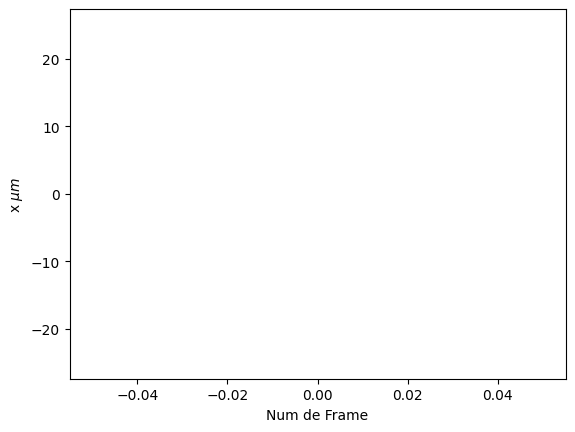

In [ ]:
for i in range(num_of_particles):
    #plt.plot(sims[i].index.get_level_values('frame'),sims[i].x)
    #print(len(sims[i].y.tolist()))
    trjpart = trj[trj.index.get_level_values(1) == i]
    s = trjpart.x.tolist()
    plt.plot(s)
plt.xlabel("Num de Frame")
plt.ylabel(r"x $\mu{}m$")